<a href="https://colab.research.google.com/github/anup-anny/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

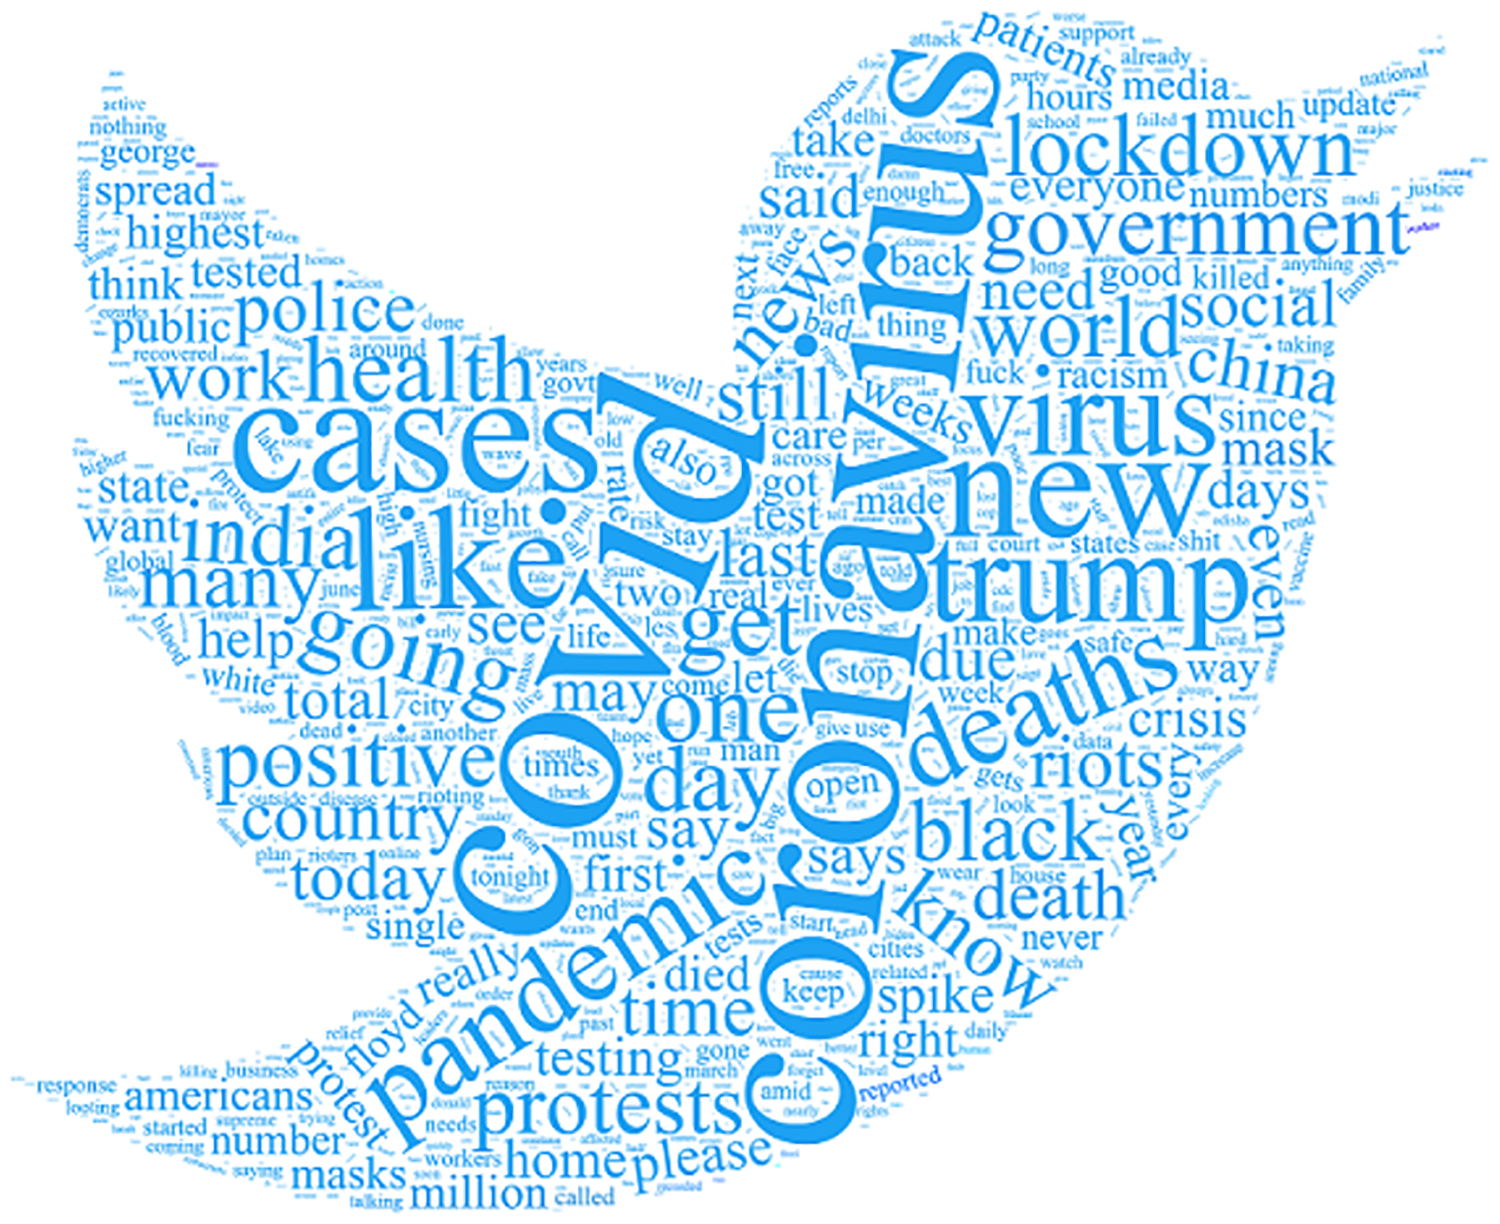

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label


In [227]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk


from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [228]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
#Assigning variable
df_orignal=pd.read_csv('/content/drive/MyDrive/ML capstone projects/Supervised ML/Classification Model/Copy of Coronavirus Tweets.csv', encoding = 'latin-1')

In [230]:
#copying data to preserve orignal file
df1=df_orignal.copy()

In [231]:
#checking Head
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [232]:
#checking info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [233]:
#checking Columns
df1.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [234]:
#For sentiment analysis we only want tweet and sentiment Features
df=df1[['OriginalTweet','Sentiment']]

In [235]:
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [236]:
#Stastastical analysis of dataset
df.describe().T

,count,unique,top,freq
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1
Sentiment,41157,5,Positive,11422


In [237]:
#checking Unique values
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [238]:
#checking Shape of the dataset
df.shape

(41157, 2)

In [239]:
#check duplicate entries
len(df[df.duplicated()])

0

##**Text preprocessing**

**Convert to LowerCase**

In [240]:

df["OriginalTweet"] = df["OriginalTweet"].str.lower()
df['OriginalTweet']

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

**Removing Punctuations**

In [241]:
df['OriginalTweet'][0]

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [242]:
df['OriginalTweet'] = df['OriginalTweet'].str.replace('http\S+|www.\S+', '', case=False)

In [243]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [244]:
df["clean_tweets"] = df['OriginalTweet'].apply(remove_punctuations)


In [245]:
df['clean_tweets']

0                   menyrbie philgahan chrisitv  and  and 
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: clean_tweets, Length: 41157, dtype: object

In [246]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#//]"," ")
df.head() 

,OriginalTweet,Sentiment,clean_tweets
0,@menyrbie @phil_gahan @chrisitv and and,Neutral,menyrbie philgahan chrisitv and and
1,advice talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,coronavirus australia: woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,my food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,"me, ready to go at supermarket during the #cov...",Extremely Negative,me ready to go at supermarket during the covid...


In [247]:
df['clean_tweets'][0]

'menyrbie philgahan chrisitv  and  and '

**Removing Stop Words**

In [248]:
#Importing Stop-words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [249]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [250]:
df['clean_tweets']= df['clean_tweets'].apply(lambda x: remove_stopwords(x))

In [251]:
df.clean_tweets[6]

['cashier',
 'grocery',
 'store',
 'sharing',
 'insights',
 'covid',
 'prove',
 'credibility',
 'commented',
 'im',
 'civics',
 'class',
 'know',
 'im',
 'talking']

**REMOVING SHORT WORDS**

In [252]:
#Removing words with than 3 letters
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: (w for w in x if len(w)>3))


**STEMMING**

In [253]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [254]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [255]:
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: stemming(x))

In [256]:
#result
df.clean_tweets[6]

'cashier groceri store share insight covid prove credibl comment civic class know talk'

# **EDA**

**TWEET COUNT FOR EACH SENTIMENT**

In [257]:
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

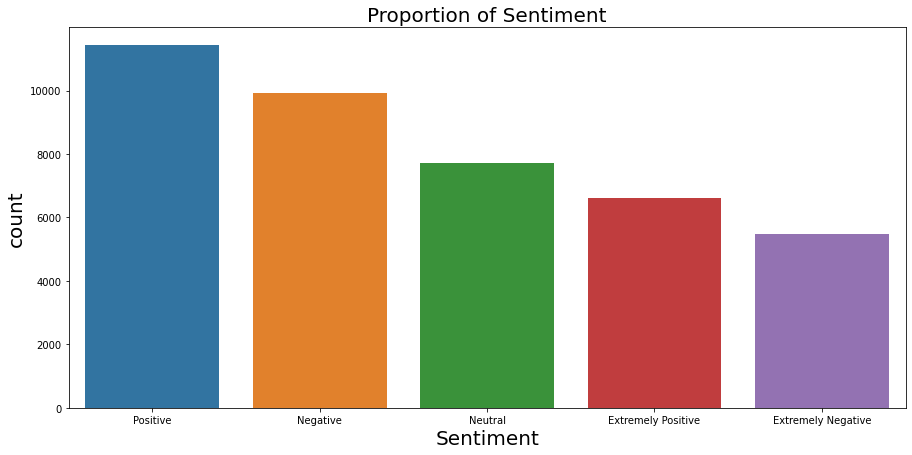

In [258]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)

In [259]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [284]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,18046
1,Negative,15398
2,Neutral,7713


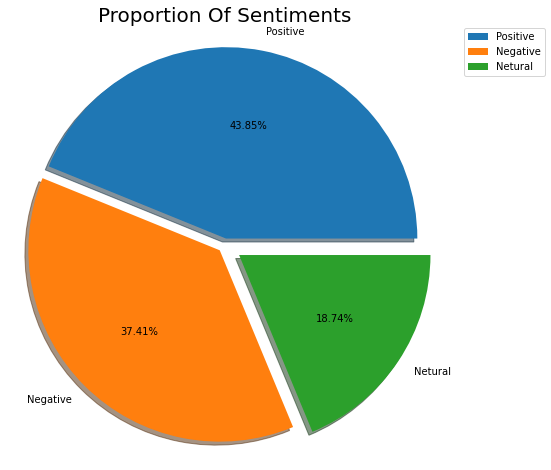

In [304]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [262]:
df['temp_list'] = df['clean_tweets'].apply(lambda x:str(x).split())

In [286]:
from collections import Counter 
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,covid,23094
1,coronaviru,18033
2,price,9050
3,store,8179
4,supermarket,7734
5,food,7225
6,groceri,6737
7,peopl,5609
8,consum,5232
9,shop,5119


In [270]:
#seperating the sentiments for word cloud 
neutral = pd.DataFrame(df['clean_tweets'] [df['Sentiment'] == 'Neutral'])
positive = pd.DataFrame(df['clean_tweets'] [df['Sentiment'] == 'Positive'])
negative = pd.DataFrame(df['clean_tweets'] [df['Sentiment'] == 'Negative'])
neutral.head()

,clean_tweets
0,menyrbi philgahan chrisitv
7,supermarket today didnt toilet paper rebel toi...
10,month hasnt crowd supermarket restaur howev re...
16,
17,eyeonthearct russia consum surveil watchdog re...


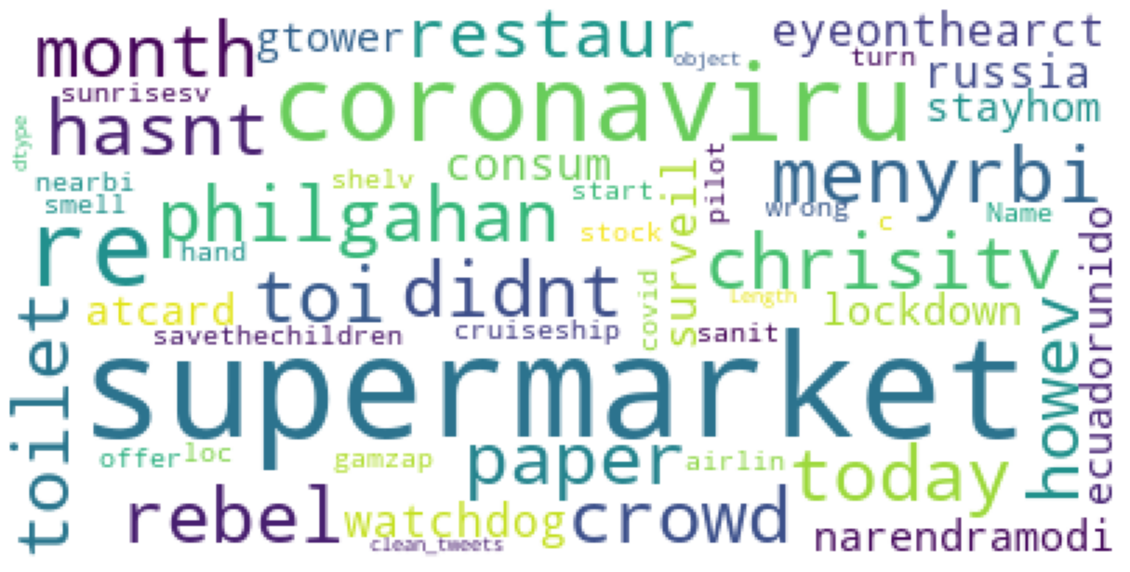

In [282]:
# Generating word cloud for neutral sentiments
wc = WordCloud(background_color='white')
wc.generate(str(neutral['clean_tweets']))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

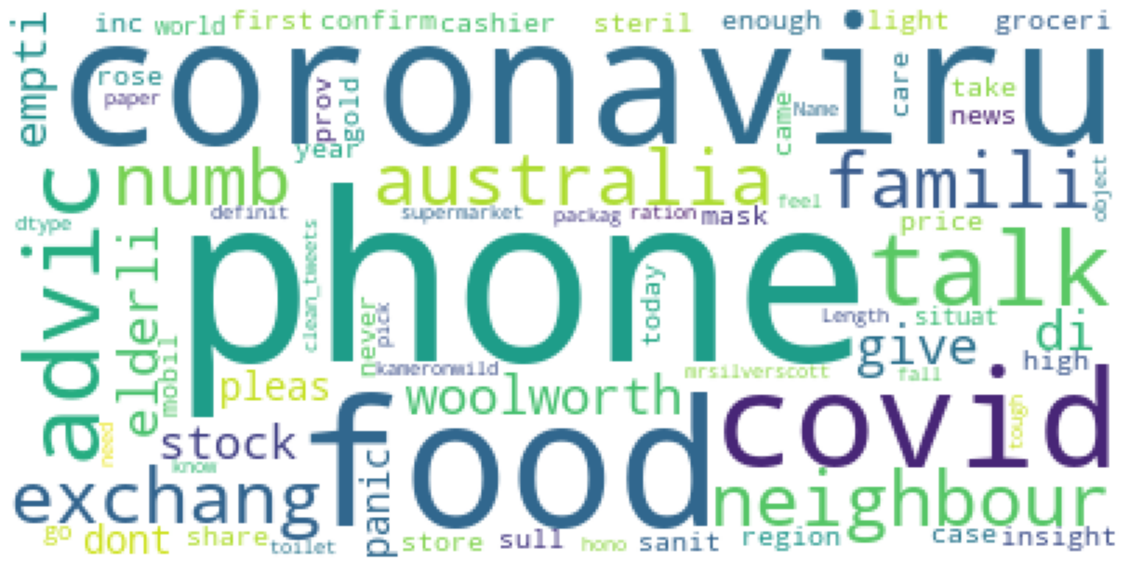

In [309]:
# Generating word cloud for positive sentiments
wc.generate(str(positive['clean_tweets']))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

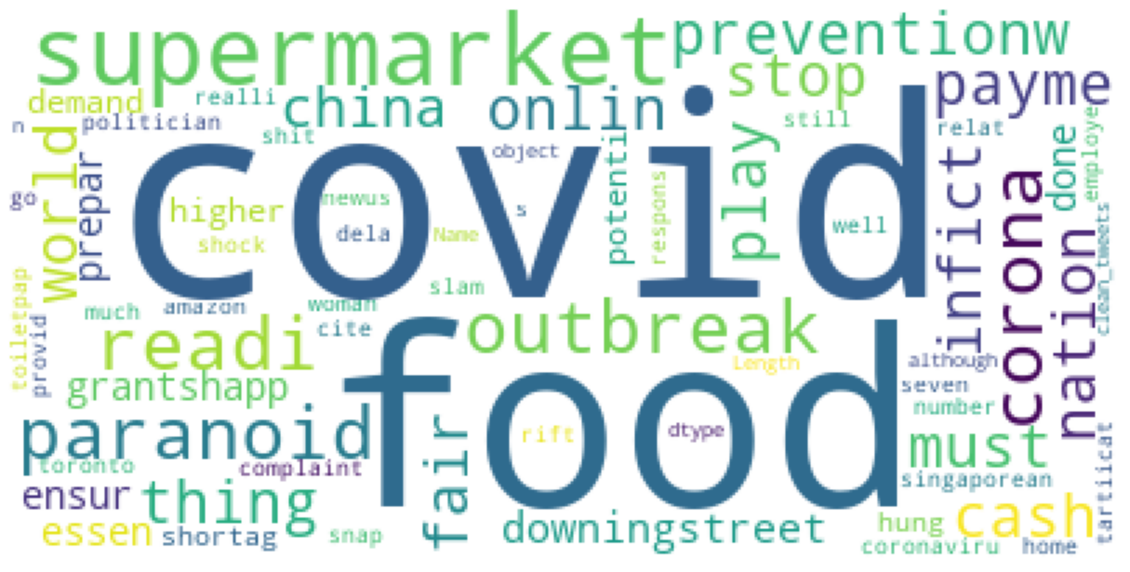

In [306]:
# Generating word cloud for negative sentiments
wc.generate(str(negative['clean_tweets']))
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()